In [1]:
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import camb
from camb import model, initialpower
from matplotlib.font_manager import FontProperties
from scipy import integrate
from scipy import special
from scipy import signal, interpolate
from numba import jit
import constnumberfile as cn
import functionfilegraph as ff
import sys; sys.path.append('..')
from scipy.optimize import curve_fit
from MHexample import vari as MHvari
#import CAMBPS.PSfun as PS
import subprocess
import itertools
#subprocess.run(['jupyter', 'nbconvert', '--to', 'python', 'UCMH.ipynb'])
from matplotlib.ticker import NullFormatter

(16, 1000)
(41, 1000)
0
10
(20, 16) (21,) (20, 16)


In [8]:
zmin=10
#zlist=np.linspace(10,50,100)      
zlist=np.array([20])
#zclist=np.logspace(np.log10(150),np.log10(1e5),50) 
#kmin=ff.kvir(20,1e4)
zclist=np.array([50,100,1000])
kmin=100
#kmin=1e2
kmax=2000
dk=400
klist=np.logspace(np.log10(kmin),np.log10(kmax),dk)
#klist=np.array([300,400,500,700])
dxy=50
J=5
k01=np.logspace(-J,0,dxy)
k02=np.logspace(0,-J,dxy)
k05=np.hstack((-k02,[0],k01))
k06=np.hstack(([0],k01))
def dzclist(zcmin):
    dzclist=np.arange(zcmin,1050+1,50)
    return dzclist

In [9]:
@jit ('f8(f8[:],f8[:],f8[:],f8[:],f8[:],f8,f8,f8,f8)')
def Tbavec(klist,zclist,zlist,k05,k06,A0,B0,NM,ex):
    C=np.zeros((len(klist),len(zclist),len(zlist))) ; Rv=np.zeros((len(klist),len(zclist),len(zlist))) ;
    Mv=np.zeros((len(klist),len(zclist),len(zlist))) ; tgasave=np.zeros((len(klist),len(zclist),len(zlist))) ;
    rgasave=np.zeros((len(klist),len(zclist),len(zlist))) ; tbave=np.zeros((len(klist),len(zclist),len(zlist))) ;
    tgas=np.zeros((len(klist),len(zclist),len(zlist),len(k05),len(k05))) ; rgas=np.zeros((len(klist),len(zclist),len(zlist),len(k05),len(k05))) ;
    ts=np.zeros((len(klist),len(zclist),len(zlist),len(k05),len(k05))) ; taucum=np.zeros((len(klist),len(zclist),len(zlist),len(k05),len(k05))) ;
    tsave=np.zeros((len(klist),len(zclist),len(zlist))) ; Frac=np.zeros((len(klist),len(zclist),len(zlist))) ;
    tbr=np.zeros((len(klist),len(zclist),len(zlist),len(k05)))
    for i,kk in enumerate(klist):
        for k,z in enumerate(zlist):
            for j,zc in enumerate(zclist):
                if (zc>4000):
                    zc=4000
                c,rv,mv,frac,Tgas,Rgas,Ts,Tsave,Tgasave,Rgasave,Tbave,Taucum,Tbr=ff.singleUCMH(k05,k05,z,zc,kk,A0,B0,k06,0,NM,ex)
                C[i,j,k],Rv[i,j,k],Mv[i,j,k],Frac[i,j,k],tsave[i,j,k],tgasave[i,j,k],rgasave[i,j,k],tbave[i,j,k],taucum[i,j,k],tbr[i,j,k]=c,rv,mv,frac,Tsave,Tgasave,Rgasave,Tbave,Taucum,Tbr
                tgas[i,j,k],rgas[i,j,k],ts[i,j,k]=Tgas,Rgas,Ts
        if(i%50==0):
            print(i)
    return  C,Rv,Mv,Frac,tgas,rgas,ts,tsave,tgasave,rgasave,tbave,taucum,tbr

In [12]:
for i,NM in enumerate(['N','M']):
    if(i==0):
        rd=200
    else:
        rd=200
    exec("c%s,rv%s,mv%s,frac%s,tgas%s,rgas%s,ts%s,tsave%s,tgasave%s,rgasave%s,tbave%s,taucum%s,tbr%s \
    =Tbavec(klist,zclist,zlist,k05,k06,30,rd,i,0)" \
    %(NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM))

0
50
100
150
200
250
300
350
0
50
100
150
200
250
300
350


In [11]:
Fi=tbaveM
Fi[Fi < cn.tcmb0*(1+zlist)]=np.nan
#Fi[Fi < cn.tcmb0*(1+zlist[1])]=np.nan

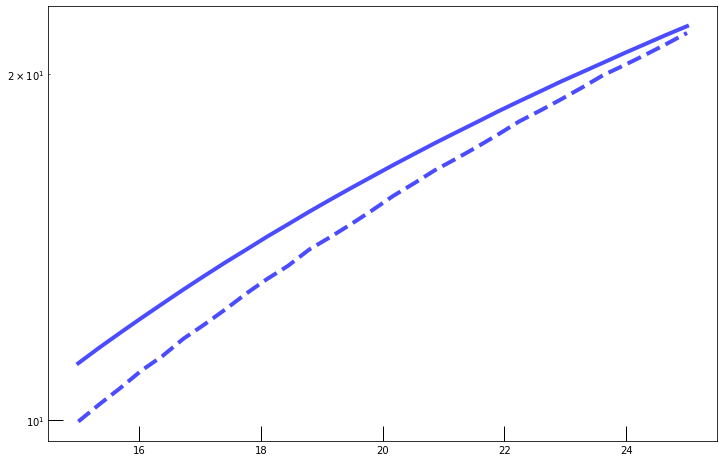

In [8]:
fig, ax = plt.subplots(1, 1,figsize=(12,8))
linestyles = ['-', '--', '-.', ':']
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.subplots_adjust(hspace=0)
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.width"] = 1
plt.rcParams["xtick.major.size"] = 15
plt.rcParams["xtick.minor.width"] = 1
plt.rcParams["xtick.minor.size"] = 10
plt.rcParams["ytick.major.width"] = 1
plt.rcParams["ytick.major.size"] = 15
#plt.rcParams["ytick.minor.width"] = 1
#plt.rcParams["ytick.minor.size"] = 10
plt.tick_params(bottom='true',labelleft='true',left='true')
#for k,i in enumerate([19]):
    #ax[2].loglog(klist,tgas[:,i,1,0],label='tgas%s'%zclist[i],linestyle='--',color=cycle[i])
    #ax[0].loglog(klist,fracM[:,i,0],label=r'$z_c$=%s'%dzclist(50)[i],ls=linestyles[k],color='black',linewidth=4)
    #ax[0].loglog(klist,tgasaveM[:,i,0],label=r'$\overline{T}_{\rm{gas}}$,$z_c$=%s'%dzclist(50)[i],ls=linestyles[k],color='green',linewidth=2)
#ax[0].set_title(label='z={0}'.format(zlist[1]),size=18)
#ax[0].set_ylabel(r' $M_{b}/M_{dm}$',size=30)
#ax[0].set_ylim(50,500)
#ax[0].set_yticks([300],[300])
for k,i in enumerate([0,10]):
    ax.semilogy(zlist,abs(tbaveM[0,i,:]-cn.tcmb0*(1+zlist)),color='blue',ls=linestyles[k],linewidth=4,alpha=0.7)
    #ax.plot(zlist,(tbaveM[10,i,:]-cn.tcmb0*(1+zlist))*np.pi*rvM[:,i,0]**2,label=r'$z_c$=%d'%dzclist(100)[i],color='black',ls=linestyles[k],linewidth=4)
#plt.title(label=r'$z_{emit}=25$  $\delta T_{b,halo}$ $\times$ $S_{halo}$',size=20)
#ax.set_yscale('logit')
#ax.set_ylabel(r'$\delta T_{b} \times \pi r_{200}^2$ $[\rm{K \cdot Mpc^2}]$',size=30)
#ax.set_xlabel(r'$k_{s} \rm{[Mpc^{-1}]}$',size=30)
#ax.legend(fontsize=15)
#ax.set_ylim(1e-13,5*1e-5)
#ax.set_xlim(100,2000)
#ax.set_yticks([1e-6,1e-9,1e-12])
#plt.gca().yaxis.set_minor_formatter(NullFormatter())
#ax.tick_params(labelbottom=False)
#ax.minorticks_off()
#ax.text(700,1e-12,r"Jeans scale",size=30 )
#ax[1].text(540,2*1e-13,r"$z_c=200,1000$",size=20)
#ax[1].text(410,1e-12,r"Jeans scale",size=20 )
#ax[1].text(410,2*1e-13,r"$z_c=200$",size=20)
#for i in range(2):
    #ax[i].grid(which = "both", axis = "both", color = "blue", alpha = 0.3,linestyle = "--", linewidth = 1)
    #ax[i].set_xlim(ff.kvir(zlist[1],1e4),1.5*1e3)
#ax.set_xlim(100,2000)
    #ax[i].axvline(x=758,ls=':')
#ax.set_xscale('log')
#ax.tick_params(labelsize=30)
#ax.tick_params(axis='y', which='minor', labelsize=20)
    #ax[i].set_xlabel(r'$k_{s} \rm{[Mpc^{-1}]}$',size=22)
    #ax[i].axvline(x=577,ls=':')
    #ax[i].axvline(x=682)
#ax.axvline(x=990,ls=':')
#ax.legend(fontsize=30)
#plt.savefig('/Users/kokoorikunihiko/Desktop/figure1.pdf',bbox_inches='tight')

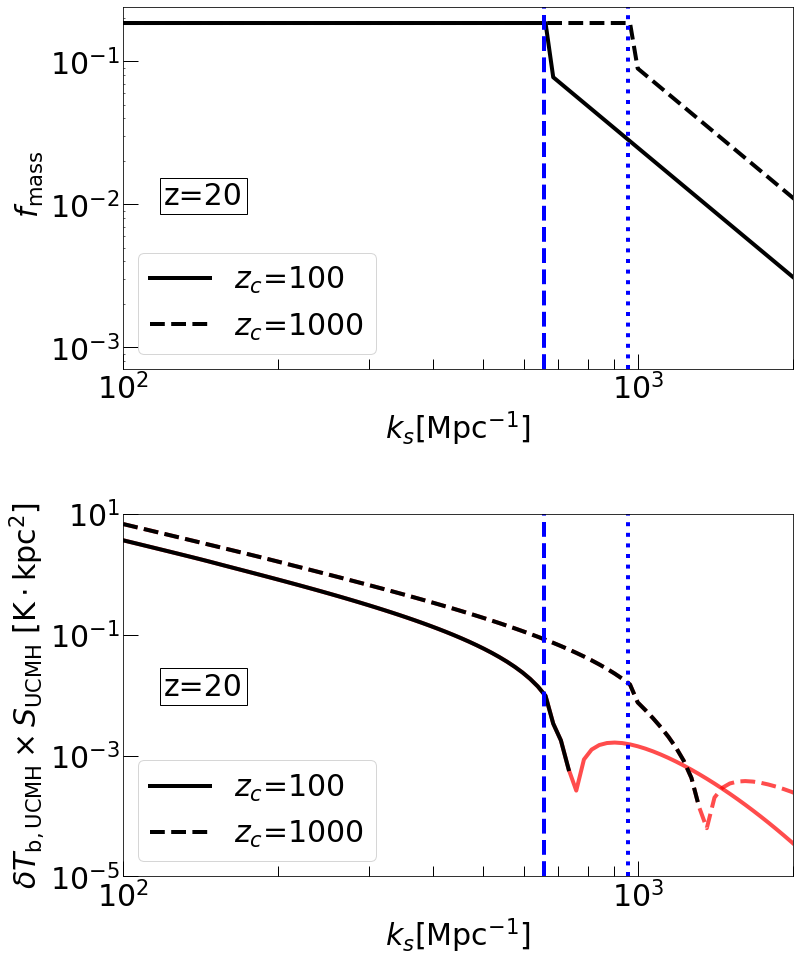

In [67]:
fig, ax = plt.subplots(2, 1,figsize=(12, 16))
linestyles = ['-', '--', '-.', ':']
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.subplots_adjust(hspace=0.4)
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.width"] = 1
plt.rcParams["xtick.major.size"] = 15
plt.rcParams["xtick.minor.width"] = 1
plt.rcParams["xtick.minor.size"] = 10
plt.rcParams["ytick.major.width"] = 1
plt.rcParams["ytick.major.size"] = 15
#plt.rcParams["ytick.minor.width"] = 1
#plt.rcParams["ytick.minor.size"] = 10
plt.tick_params(bottom='true',labelleft='true',left='true')
for k,i in enumerate([0,9]):
    #ax[2].loglog(klist,tgas[:,i,1,0],label='tgas%s'%zclist[i],linestyle='--',color=cycle[i])
    ax[0].loglog(klist,fracM[:,i,0],label=r'$z_c$=%s'%dzclist(100)[i],ls=linestyles[k],color='black',linewidth=4)
    #ax[0].loglog(klist,tgasaveM[:,i,0],label=r'$\overline{T}_{\rm{gas}}$,$z_c$=%s'%dzclist(50)[i],ls=linestyles[k],color='green',linewidth=2)
#ax[0].set_title(label='z={0}'.format(zlist[1]),size=18)
ax[0].set_ylabel(r' $f_{\rm{mass}}$',size=30)
#ax[0].set_ylim(50,500)
#ax[0].set_yticks([300],[300])
plt.savefig('/Users/kokoorikunihiko/Desktop/graph/figure1-a.eps',bbox_inches='tight')
for k,i in enumerate([0,9]):
    ax[1].plot(klist,abs(tbaveM[:,i,0]-cn.tcmb0*(1+zlist[0]))*np.pi*(rvM[:,i,0]*1e3)**2,color='red',ls=linestyles[k],linewidth=4,alpha=0.7)
    ax[1].plot(klist,(Fi[:,i,0]-cn.tcmb0*(1+zlist[0]))*np.pi*(rvM[:,i,0]*1e3)**2,label=r'$z_c$=%d'%dzclist(100)[i],color='black',ls=linestyles[k],linewidth=4)
#plt.title(label=r'$z_{emit}=25$  $\delta T_{b,halo}$ $\times$ $S_{halo}$',size=20)
ax[1].set_yscale('log')
ax[1].set_ylabel(r'$\delta T_{\rm b ,UCMH} \times S_{\rm UCMH}$ $[\rm{K \cdot kpc^2}]$',size=30)
ax[1].legend(fontsize=15)
ax[1].set_ylim(1e-5,1e1)
ax[1].set_xlim(100,2000)
#ax[1].set_yticks([1e-6,1e-9,1e-12])
plt.gca().yaxis.set_minor_formatter(NullFormatter())
#ax[0].tick_params(labelbottom=False)
ax[1].minorticks_off()
#ax[1].text(670,1e-4,r"Jeans scale",size=20 )
#ax[1].text(570,2.1*1e-5,r"$z_c=200,1000$",size=20)
#ax[1].text(410,1e-12,r"Jeans scale",size=20 )
#ax[1].text(410,2*1e-13,r"$z_c=200$",size=20)
for i in range(2):
    #ax[i].grid(which = "both", axis = "both", color = "blue", alpha = 0.3,linestyle = "--", linewidth = 1)
    #ax[i].set_xlim(ff.kvir(zlist[1],1e4),1.5*1e3)
    ax[i].set_xlim(100,2000)
    ax[i].axvline(x=658,ls='dashed',linewidth='4',color='blue')
    ax[i].set_xscale('log')
    ax[i].set_xlabel(r'$k_{s} \rm{[Mpc^{-1}]}$',size=30)
    ax[i].tick_params(labelsize=30)
    ax[i].tick_params(axis='y', which='minor', labelsize=20)
    #ax[i].set_xlabel(r'$k_{s} \rm{[Mpc^{-1}]}$',size=22)
    #ax[i].axvline(x=577,ls=':')
    #ax[i].axvline(x=682)
    ax[i].axvline(x=955,ls='dotted',linewidth='4',color='blue')
    ax[i].legend(fontsize=30)
    ax[i].text(120,1e-2,'z=20',size=30 ,bbox=dict(facecolor='white', alpha=1.0))
plt.savefig('/Users/kokoorikunihiko/Desktop/graph/figure1-b.eps',bbox_inches='tight')

Text(120, 0.01, 'z=20')

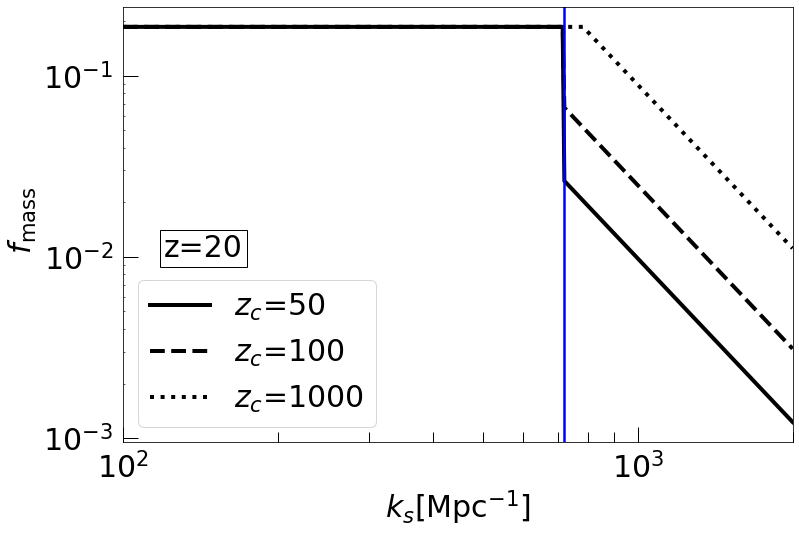

In [23]:
fig, ax = plt.subplots(1, 1,figsize=(12, 8))
linestyles = ['-', '--', ':','-.']
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.width"] = 1
plt.rcParams["xtick.major.size"] = 15
plt.rcParams["xtick.minor.width"] = 1
plt.rcParams["xtick.minor.size"] = 10
plt.rcParams["ytick.major.width"] = 1
plt.rcParams["ytick.major.size"] = 15
#plt.rcParams["ytick.minor.width"] = 1
#plt.rcParams["ytick.minor.size"] = 10
plt.tick_params(bottom='true',labelleft='true',left='true')
for k,i in enumerate([0,1,2]):
#ax[2].loglog(klist,tgas[:,i,1,0],label='tgas%s'%zclist[i],linestyle='--',color=cycle[i])
    plt.semilogy(klist,fracM[:,i,0],label=r'$z_c$=%s'%zclist[i],ls=linestyles[k],color='black',linewidth=4)
#ax[0].loglog(klist,tgasaveM[:,i,0],label=r'$\overline{T}_{\rm{gas}}$,$z_c$=%s'%dzclist(50)[i],ls=linestyles[k],color='green',linewidth=2)
#ax[0].set_title(label='z={0}'.format(zlist[1]),size=18)
plt.ylabel(r' $f_{\rm{mass}}$',size=30)
#ax[0].set_ylim(50,500)
#ax[0].set_yticks([300],[300])
#plt.savefig('/Users/kokoorikunihiko/Desktop/graph/figure1-a.eps',bbox_inches='tight')
#for k,i in enumerate([0,9]):
#ax[1].plot(klist,abs(tbaveM[:,i,0]-cn.tcmb0*(1+zlist[0]))*np.pi*(rvM[:,i,0]*1e3)**2,color='red',ls=linestyles[k],linewidth=4,alpha=0.7)
#ax[1].plot(klist,(Fi[:,i,0]-cn.tcmb0*(1+zlist[0]))*np.pi*(rvM[:,i,0]*1e3)**2,label=r'$z_c$=%d'%dzclist(100)[i],color='black',ls=linestyles[k],linewidth=4)
#plt.title(label=r'$z_{emit}=25$  $\delta T_{b,halo}$ $\times$ $S_{halo}$',size=20)
#ax[1].set_yscale('log')
#ax[1].set_ylabel(r'$\delta T_{\rm b ,UCMH} \times S_{\rm UCMH}$ $[\rm{K \cdot kpc^2}]$',size=30)
#ax[1].legend(fontsize=15)
#ax[1].set_ylim(1e-5,1e1)
#ax[1].set_xlim(100,2000)
#ax[1].set_yticks([1e-6,1e-9,1e-12])
#plt.gca().yaxis.set_minor_formatter(NullFormatter())
#ax[0].tick_params(labelbottom=False)
#ax[1].minorticks_off()
#ax[1].text(670,1e-4,r"Jeans scale",size=20 )
#ax[1].text(570,2.1*1e-5,r"$z_c=200,1000$",size=20)
#ax[1].text(410,1e-12,r"Jeans scale",size=20 )
#ax[1].text(410,2*1e-13,r"$z_c=200$",size=20)
#for i in range(2):
#ax[i].grid(which = "both", axis = "both", color = "blue", alpha = 0.3,linestyle = "--", linewidth = 1)
#ax[i].set_xlim(ff.kvir(zlist[1],1e4),1.5*1e3)
plt.xlim(100,2000)
#plt.axvline(x=658,ls='dashed',linewidth='2.5',color='blue')
plt.xscale('log')
plt.xlabel(r'$k_{s} \rm{[Mpc^{-1}]}$',size=30)
plt.tick_params(labelsize=30,pad=10)
plt.tick_params(axis='y', which='minor', labelsize=20)
#ax[i].set_xlabel(r'$k_{s} \rm{[Mpc^{-1}]}$',size=22)
#ax[i].axvline(x=577,ls=':')
#ax[i].axvline(x=682)
#plt.axvline(x=955,ls='-.',linewidth='2.5',color='blue')
plt.axvline(x=ff.kJm(20),ls='-',linewidth='2.5',color='blue')
plt.legend(fontsize=30)
plt.text(120,1.0*1e-2,'z=20',size=30 ,bbox=dict(facecolor='white', alpha=1.0))
#plt.savefig('figure/graph1-a.eps',bbox_inches='tight')

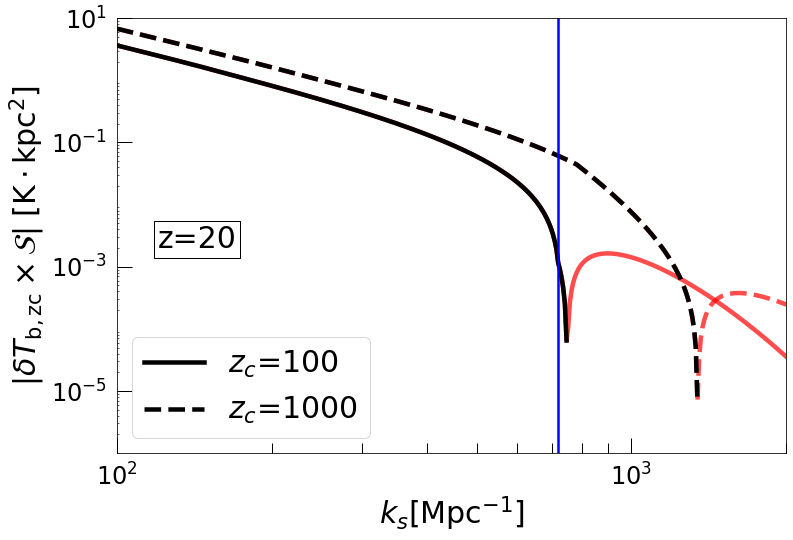

In [30]:
fig, ax = plt.subplots(1, 1,figsize=(12, 8))
linestyles = ['-', '--', ':','-.']
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
#plt.rcParams["xtick.direction"] = "in"
#plt.rcParams["ytick.direction"] = "in"
#plt.rcParams["xtick.major.width"] = 1
#plt.rcParams["xtick.major.size"] = 10
#plt.rcParams["xtick.minor.width"] = 1
#plt.rcParams["xtick.minor.size"] = 10
#plt.rcParams["ytick.major.width"] = 1
#plt.rcParams["ytick.major.size"] = 10
#plt.rcParams["ytick.minor.width"] = 1
#plt.rcParams["ytick.minor.size"] = 10
#plt.tick_params(bottom='true',labelleft='true',left='true')
#for k,i in enumerate([0,9]):
#ax[2].loglog(klist,tgas[:,i,1,0],label='tgas%s'%zclist[i],linestyle='--',color=cycle[i])
    #plt.loglog(klist,fracM[:,i,0],label=r'$z_c$=%s'%dzclist(100)[i],ls=linestyles[k],color='black',linewidth=4)
#ax[0].loglog(klist,tgasaveM[:,i,0],label=r'$\overline{T}_{\rm{gas}}$,$z_c$=%s'%dzclist(50)[i],ls=linestyles[k],color='green',linewidth=2)
#ax[0].set_title(label='z={0}'.format(zlist[1]),size=18)
#plt.ylabel(r' $f_{\rm{mass}}$',size=30)
plt.ylim(1e-6,10)
#ax[0].set_yticks([300],[300])
#plt.savefig('/Users/kokoorikunihiko/Desktop/graph/figure1-a.eps',bbox_inches='tight')
for k,i in enumerate([1,2]):
    plt.plot(klist,abs(tbaveM[:,i,0]-cn.tcmb0*(1+zlist[0]))*np.pi*(rvM[:,i,0]*1e3)**2,color='red',ls=linestyles[k],linewidth=4.5,alpha=0.7)
    plt.plot(klist,(Fi[:,i,0]-cn.tcmb0*(1+zlist[0]))*np.pi*(rvM[:,i,0]*1e3)**2,label=r'$z_c$=%d'%zclist[i],color='black',ls=linestyles[k],linewidth=4.5)
#plt.title(label=r'$z_{emit}=25$  $\delta T_{b,halo}$ $\times$ $S_{halo}$',size=20)
plt.yscale('log')
#ax[1].set_ylabel(r'$\delta T_{\rm b ,UCMH} \times S_{\rm UCMH}$ $[\rm{K \cdot kpc^2}]$',size=30)
#ax[1].legend(fontsize=15)
#ax[1].set_ylim(1e-5,1e1)
#ax[1].set_xlim(100,2000)
plt.yticks([1e-5,1e-3,1e-1,1e1])
#plt.xticks([1e2,1e3])
#plt.gca().yaxis.set_minor_formatter(NullFormatter())
#ax[0].tick_params(labelbottom=False)
#ax[1].minorticks_off()
#ax[1].text(670,1e-4,r"Jeans scale",size=20 )
#ax[1].text(570,2.1*1e-5,r"$z_c=200,1000$",size=20)
#ax[1].text(410,1e-12,r"Jeans scale",size=20 )
#ax[1].text(410,2*1e-13,r"$z_c=200$",size=20)
#for i in range(2):
#ax[i].grid(which = "both", axis = "both", color = "blue", alpha = 0.3,linestyle = "--", linewidth = 1)
#ax[i].set_xlim(ff.kvir(zlist[1],1e4),1.5*1e3)
plt.xlim(100,2000)
#plt.axvline(x=658,ls='dashed',linewidth='2.5',color='#4682b4')
plt.xscale('log')
plt.xlabel(r'$k_{s} \rm{[Mpc^{-1}]}$',size=30)
plt.tick_params(labelsize=24,pad=10)
#plt.tick_params(axis='y', which='minor', labelsize=20)
plt.ylabel(r'$ |\delta T_{\rm b ,zc} \times \mathcal{S}|$ $[\rm{K \cdot kpc^2}]$',size=30)
#ax[i].set_xlabel(r'$k_{s} \rm{[Mpc^{-1}]}$',size=22)
plt.axvline(x=ff.kJm(20),ls='-',linewidth='2.5',color='blue')
#ax[i].axvline(x=577,ls=':')
#ax[i].axvline(x=682)
#plt.axhline(y=MHvari(20)[0])
#plt.axvline(x=515,ls='-',linewidth='2.5',color='#4682b4')
#plt.axvline(x=955,ls='-.',linewidth='2.5',color='#4682b4')
plt.legend(fontsize=30)
plt.text(120,2*1e-3,'z=20',size=30 ,bbox=dict(facecolor='white', alpha=1.0))
plt.savefig('figure/graph1-b.eps',bbox_inches='tight')

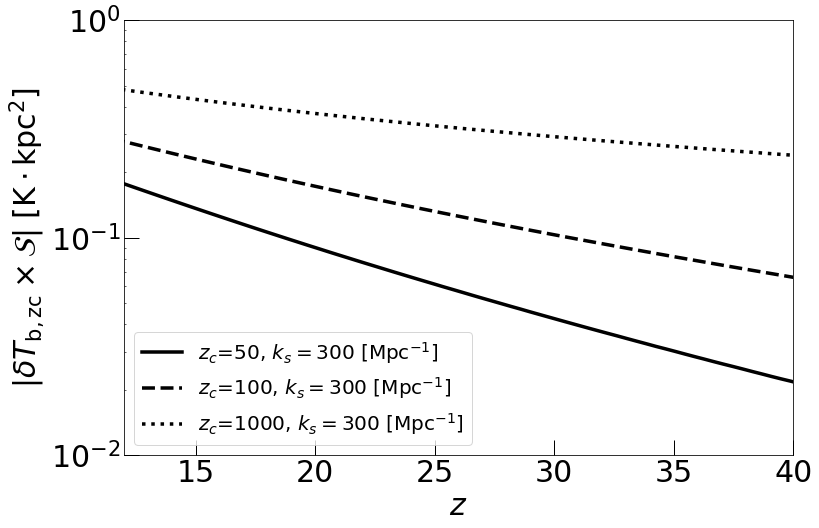

In [140]:
fig, ax = plt.subplots(1, 1,figsize=(12, 8))
linestyles = ['-', '--',  ':','-.']
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.width"] = 1
plt.rcParams["xtick.major.size"] = 15
plt.rcParams["xtick.minor.width"] = 1
plt.rcParams["xtick.minor.size"] = 10
plt.rcParams["ytick.major.width"] = 1
plt.rcParams["ytick.major.size"] = 15
#plt.rcParams["ytick.minor.width"] = 1
#plt.rcParams["ytick.minor.size"] = 10
plt.tick_params(bottom='true',labelleft='true',left='true')
#for k,i in enumerate([0,9]):
#ax[2].loglog(klist,tgas[:,i,1,0],label='tgas%s'%zclist[i],linestyle='--',color=cycle[i])
    #plt.loglog(klist,fracM[:,i,0],label=r'$z_c$=%s'%dzclist(100)[i],ls=linestyles[k],color='black',linewidth=4)
#ax[0].loglog(klist,tgasaveM[:,i,0],label=r'$\overline{T}_{\rm{gas}}$,$z_c$=%s'%dzclist(50)[i],ls=linestyles[k],color='green',linewidth=2)
#ax[0].set_title(label='z={0}'.format(zlist[1]),size=18)
#plt.ylabel(r' $f_{\rm{mass}}$',size=30)
plt.ylim(1e-6,10)
#ax[0].set_yticks([300],[300])
#plt.savefig('/Users/kokoorikunihiko/Desktop/graph/figure1-a.eps',bbox_inches='tight')
for k,i in enumerate([0,1,2]):
    #plt.plot(zlist,abs(tbaveM[0,i,:]-cn.tcmb0*(1+zlist[:]))*np.pi*(rvM[0,i,:]*1e3)**2,color='black',label=r'$z_c$=%d, k=%d$[{\rm Mpc^{-1}}]$'%(zclist[i],klist[0]),ls=linestyles[k],linewidth=3.5,alpha=0.7)
    plt.semilogy(zlist,abs(tbaveM[0,i,:]-cn.tcmb0*(1+zlist[:]))*np.pi*(rvM[1,i,:]*1e3)**2,color='black',label=r'$z_c$=%d, $k_s=%d$ $[{\rm Mpc^{-1}}]$'%(zclist[i],klist[0]),ls=linestyles[k],linewidth=3.5)
    #plt.semilogy(zlist,abs(Fi[1,i,:]-cn.tcmb0*(1+zlist[:]))*np.pi*(rvM[1,i,:]*1e3)**2,color='red',label=r'$z_c$=%d, k=%d$[{\rm Mpc^{-1}}]$'%(zclist[i],klist[1]),ls=linestyles[k],linewidth=3.5,alpha=0.7)
    #plt.plot(zlist,(Fi[0,i,:]-cn.tcmb0*(1+zlist[:]))*np.pi*(rvM[0,i,:]*1e3)**2,label=r'$z_c$=%d, k=%d'%(zclist[i],klist[0]),color='black',ls=linestyles[k],linewidth=4.5)
#plt.title(label=r'$z_{emit}=25$  $\delta T_{b,halo}$ $\times$ $S_{halo}$',size=20)
#plt.yscale('log')
#ax[1].set_ylabel(r'$\delta T_{\rm b ,UCMH} \times S_{\rm UCMH}$ $[\rm{K \cdot kpc^2}]$',size=30)
#ax[1].legend(fontsize=15)
#ax[1].set_ylim(1e-5,1e1)
#ax[1].set_xlim(100,2000)
#plt.yticks([1e-5,1e-3,1e-1,1e1])
#plt.gca().yaxis.set_minor_formatter(NullFormatter())
#ax[0].tick_params(labelbottom=False)
#ax[1].minorticks_off()
#ax[1].text(670,1e-4,r"Jeans scale",size=20 )
#ax[1].text(570,2.1*1e-5,r"$z_c=200,1000$",size=20)
#ax[1].text(410,1e-12,r"Jeans scale",size=20 )
#ax[1].text(410,2*1e-13,r"$z_c=200$",size=20)
#for i in range(2):
#ax[i].grid(which = "both", axis = "both", color = "blue", alpha = 0.3,linestyle = "--", linewidth = 1)
#ax[i].set_xlim(ff.kvir(zlist[1],1e4),1.5*1e3)
plt.ylim(1e-2,1e0)
plt.xlim(12,40)
#plt.axvline(x=658,ls='dashed',linewidth='2.5',color='#4682b4')
#plt.xscale('log')
plt.xlabel(r'$z$',size=30)
plt.tick_params(labelsize=30)
plt.tick_params(axis='y', which='minor', labelsize=20)
plt.ylabel(r'$|\delta T_{\rm b ,zc} \times \mathcal{S}|$ $[\rm{K \cdot kpc^2}]$',size=30)
#ax[i].set_xlabel(r'$k_{s} \rm{[Mpc^{-1}]}$',size=22)
#ax[i].axvline(x=577,ls=':')
#ax[i].axvline(x=682)
#plt.axhline(y=MHvari(20)[0])
#plt.axvline(x=515,ls='-',linewidth='2.5',color='#4682b4')
#plt.axvline(x=955,ls='-.',linewidth='2.5',color='#4682b4')
plt.legend(fontsize=20)#,bbox_to_anchor=(0.54,0.57))
#plt.text(120,1e-3,'z=20',size=30 ,bbox=dict(facecolor='white', alpha=1.0))
#plt.savefig('/Users/kokoorikunihiko/Desktop/graph/tbz.eps',bbox_inches='tight')
plt.savefig('figure/graph4.eps',bbox_inches='tight')

In [34]:
np.save("cszc/zlist01.npy",zlist)
np.save("cszc/klist01.npy",klist)
np.save("cszc/zclist01.npy",zclist)
np.save("cszc/TbSkpc2_01.npy",abs(tbaveM[:,:,:]-cn.tcmb0*(1+zlist[None,None,:]))*np.pi*(rvM[:,:,:]*1e3)**2)

In [14]:
print(cM[0,0,:])

[3.5760638  3.41270564 3.26172309 3.12113606 2.99044952 2.86867343
 2.75481774 2.64838742 2.54839242 2.45433772 2.36572829 2.2820691
 2.20336017 2.12910646 2.05831792 1.99148957 1.92812641 1.86773339
 1.81031052 1.75585779 1.70388019 1.65437772 1.60685534 1.56180809
 1.51824591 1.47715886 1.43706185 1.39894495 1.36280814 1.32766138
 1.2939997  1.26182309 1.23063653 1.20044002 1.17172859 1.1440072
 1.11727586 1.09153458 1.06628831 1.04252713 1.01926096 0.99648982
 0.97470874 0.9539177  0.93362168 0.91382069 0.89500975 0.87619881
 0.85837792 0.84105205 0.82422121 0.80788539 0.7920446  0.77669883
 0.76184809 0.74749237 0.73363168 0.71977099 0.70640532 0.69353468
 0.68066403 0.66878344 0.65690285 0.64502225 0.63363668 0.62274614
 0.61185559 0.60146007 0.59155958 0.58165908 0.57175859 0.56235312
 0.55294765 0.5440372  0.53562178 0.52671134 0.51829591 0.51037552
 0.50245512 0.49453473 0.48661433 0.47918896 0.47225861 0.46483324
 0.4579029  0.45146757 0.44453723 0.43810191 0.43166658 0.425231